In [114]:
import numpy as np
import matplotlib.pyplot as plt

# Implementing Differential Equations Solvers
In this lecture, we will try to solve some example differential equations using the methods we derived earlier in the week.  We will use the test problem $\dot{x} = \lambda x$ as an example because we already know the solution and so it will be easy to compute the error and confirm our accuracy and stability analysis.  In particular, we will try an example with both a positive and negative $\lambda$ so that we can see what happens when the true solution is unstable or stable.  

## Forward Euler
First, let's try to solve the initial value problem 

$\dot{x} = \lambda x$ and $x(0) = x_0$

with $\lambda = 0.5$ and $x_0 = 1$.  We know that the true solution is 

$x(t) = x_0e^{\lambda t} = e^{0.5t}$.  

We can plot this true solution with the code 

In [115]:
lam = 0.5
x0 = 1
x_true = lambda t: x0 * np.exp(lam * t)

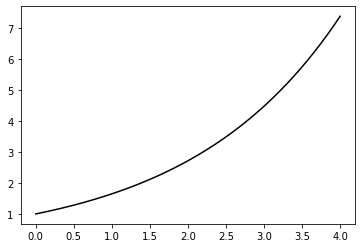

In [116]:
tplot = np.linspace(0, 4, 1000)
plt.plot(tplot, x_true(tplot), 'k')

If we want to solve this numerically, the first thing we have to do is choose the $t$ values that we want to approximate $x$ at.  Since we always choose evenly spaced $t$'s that start at $t_0 = 0$, this means that we have to choose a spacing $\Delta t$ and a final time $T$.  For no particular reason, let's choose $\Delta t = 0.1$ and $T = 4$.  

In [117]:
dt = 0.1
T = 4
t = np.arange(0, T + dt, dt)

We want to find an approximation of $x$ at each of these $t$ values.  The most convenient way to store these approximations in python is to make a 1D array of $x$'s that is the same size as the array `t`.  

In [118]:
n = t.size
x = np.zeros(n)

The first entry of `x` will contain the approximation at the first t, the second entry of `x` will contain the approximation at the second t, etc.  In particular, we already know that the first entry of `x` should just be the initial condition.  

In [119]:
x[0] = x0

The meat of the algorithm comes when we fill in the rest of the array `x`.  We know that we need to use the formula $x_{k+1} = x_k + \Delta t f(t_k, x_k)$.  Since $f$ is just the right hand side of our differential equation, we know that $f(t, x) = \lambda x$, so the forward Euler equation is just $x_{k+1} = x_k + \Delta t\lambda x_k$.  To use this formula over and over again, we should put it in a loop, so the code will look like 

`for k in range(something):
    x[k + 1] = x[k] + dt * lam * x[k]`
    
The only question is what to use for the bounds of k.  Remember that we want to fill in all n entries of the vector `x`, one after the other.  The first entry (at index 0) is already done, so the first one we have to do in the loop is `x[1]`, which means k should start at 0.  The last entry we have to do in the loop is `x[n-1]` (because `n-1` is the last valid index), which means k should go up to but not include `n-1`.  This means that our final code should look like this: 

In [120]:
for k in range(n-1):
    x[k + 1] = x[k] + dt * lam * x[k]

We have now filled in the entire array `x` and we can plot it to see how well we did.  

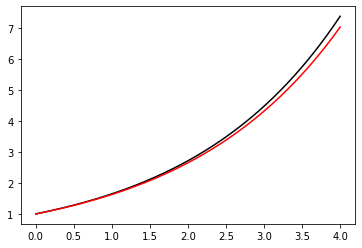

In [121]:
plt.plot(tplot, x_true(tplot), 'k', t, x, 'r')

This approximation doesn't look too bad.  We can quantify just how good or bad it is by calculating the error.  If we want to know the local accuracy, we can check the error at our first approximation (which is actually the second $x$ value, since the first one is exact).  

In [122]:
err_local = np.abs(x[1] - x_true(t[1]))
print(err_local)

0.0012710963760240723


If we want to know the global accuracy, we can check the error at our last approximation.  

In [123]:
err_global = np.abs(x[-1] - x_true(t[-1]))
print(err_global)

0.34906738680600213


Another useful measure of accuracy is the maximum error.  That is, we find the alrgest error out of all of our approximations.  It turns out (and we will verify this for our examples) that the maximum error may or may not be the same value as the global error, but it does have the same order.  (That is, it behaves the same way when we reduce $\Delta t$.)

In [124]:
err_max = np.max(np.abs(x - x_true(t)))
print(err_max)

0.34906738680600213


We can confirm the local and global orders of accuracy by reducing $\Delta t$ and checking how these errors change.  For instance, if we reduce $\Delta t$ by a factor of ten then we get 

In [125]:
dt = 0.01
T = 4
t = np.arange(0, T + dt, dt)

n = t.size
x = np.zeros(n)
x[0] = x0

for k in range(n - 1):
    x[k + 1] = x[k] + dt * lam * x[k]

In [126]:
err_local = np.abs(x[1] - x_true(t[1]))
print(err_local)

1.2520859401066176e-05


In [127]:
err_global = np.abs(x[-1] - x_true(t[-1]))
print(err_global)

0.03673099099145727


In [128]:
err_max = np.max(np.abs(x - x_true(t)))
print(err_max)

0.03673099099145727


Notice that the local error went down by a factor of $10^2$, while the global and maximum errors only went down by a factor of 10.  This confirms that forward Euler has second order local accuracy and first order global accuracy.  

We can also check the stability of forward Euler by solving this initial value problem over a much longer time.  Since the true solution is unstable, we expect that our forward Euler approximation will also be unstable, regardless of how big we make $\Delta t$.  

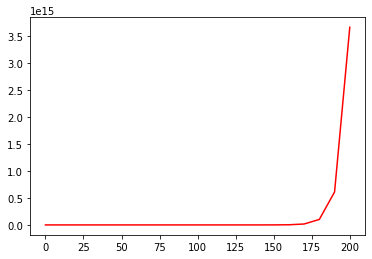

In [129]:
dt = 10
T = 200
t = np.arange(0, T + dt, dt)

n = t.size
x = np.zeros(n)
x[0] = x0

for k in range(n - 1):
    x[k + 1] = x[k] + dt * lam * x[k]
    
plt.plot(t, x, 'r')

As you can see, the approximation does go to infinity, even with a very large $\Delta t$.  (We didn't calculate the errors here, but it's worth noting that the global error is enormous.  In general, if the true solution goes to infinity then there is no hope of getting a particularly small error.  The best we can hope for is that we get the general shape of the solution correct.)

Now let's try the same thing, but with a different value of $\lambda$.  In particular, let's choose $\lambda = -0.5$.  The code is the same as before, except that we change the value of $\lambda$.  We find 

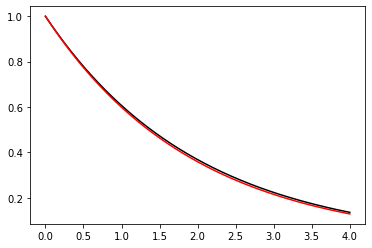

In [130]:
lam = -0.5
x0 = 1
x_true = lambda t: x0 * np.exp(lam * t)

dt = 0.1
T = 4
t = np.arange(0, T + dt, dt)

n = t.size
x = np.zeros(n)
x[0] = x0

for k in range(n - 1):
    x[k + 1] = x[k] + dt * lam * x[k]
    
plt.plot(tplot, x_true(tplot), 'k', t, x, 'r')

In [131]:
err_local = np.abs(x[1] - x_true(t[1]))
print(err_local)

0.0012294245007140603


In [132]:
err_global = np.abs(x[-1] - x_true(t[-1]))
print(err_global)

0.006823126671509361


In [133]:
err_max = np.max(np.abs(x - x_true(t)))
print(err_max)

0.009393518762900122


As before, we can confirm the local and global accuracy by seeing how these errors change as we decrease $\Delta t$.  We get 

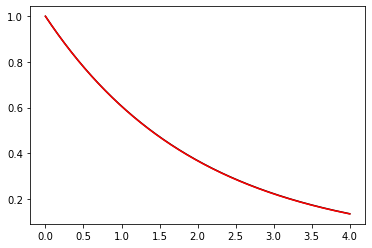

In [134]:
dt = 0.01
T = 4
t = np.arange(0, T + dt, dt)

n = t.size
x = np.zeros(n)
x[0] = x0

for k in range(n - 1):
    x[k + 1] = x[k] + dt * lam * x[k]
    
plt.plot(tplot, x_true(tplot), 'k', t, x, 'r')

In [135]:
err_local = np.abs(x[1] - x_true(t[1]))
print(err_local)

1.2479192682324225e-05


In [136]:
err_global = np.abs(x[-1] - x_true(t[-1]))
print(err_global)

0.0006772403105990976


In [137]:
err_max = np.max(np.abs(x - x_true(t)))
print(err_max)

0.0009216194452749682


As you can see, the local error dropped by a factor of $10^2$, while the global and maximum errors dropped by a factor of 10.  This confirms once again that forward Euler has second order local accuracy and first order global accuracy.  

To test the stability properties, we should solve the same initial value problem over a much longer time period.  The true solution is stable, so we would like our approximation to go to zero, but we already know from our stability analysis that if $\Delta t$ is too large then the approximation will go to infinity.  We get 

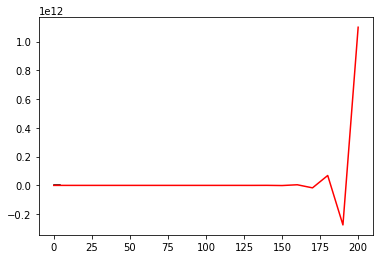

In [138]:
dt = 10
T = 200
t = np.arange(0, T + dt, dt)

n = t.size
x = np.zeros(n)
x[0] = x0

for k in range(n - 1):
    x[k + 1] = x[k] + dt * lam * x[k]
    
plt.plot(tplot, x_true(tplot), 'k', t, x, 'r')

This confirms our stability analysis.  

## Backward Euler
Now we will try to solve the same problems with the backward Euler method.  To start, let's use $\lambda = 0.5$.  All of the setup code is exactly the same, so we will start with 

In [139]:
lam = 0.5
x0 = 1
x_true = lambda t: x0 * np.exp(lam * t)

dt = 0.1
T = 4
t = np.arange(0, T + dt, dt)

n = t.size
x = np.zeros(n)
x[0] = x0

The only difference comes in our for loop.  Instead of the forward Euler equation, we need to use the formula $x_{k+1} = x_k + \Delta t f(t_{k+1}, x_{k+1})$.  The function $f$ is just the right hand side of our differential equation, so $f(t, x) = \lambda x$ and our backward Euler equation becomes 

$x_{k+1} = x_k + \Delta t\lambda x_{k+1}$.  

This is not actually solved for $x_{k+1}$ yet, but it is easy to solve by hand.  We get the formula

$x_{k+1} = \frac{x_k}{1 - \Delta t\lambda}$.  

We can therefore rewrite our loop as 

In [140]:
for k in range(n - 1):
    x[k + 1] = x[k] / (1 - dt * lam)

We can now check the quality of our approximation by graphing it

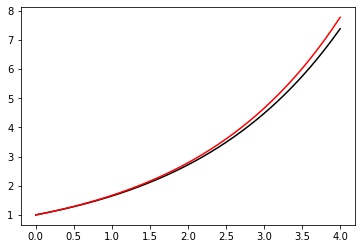

In [141]:
tplot = np.linspace(0, T, 1000)
plt.plot(tplot, x_true(tplot), 'k', t, x, 'r')

or by calculating the various errors.  

In [142]:
err_local = np.abs(x[1] - x_true(t[1]))
print(err_local)

0.0013604825713442459


In [143]:
err_global = np.abs(x[-1] - x_true(t[-1]))
print(err_global)

0.3923089230889518


In [144]:
err_max = np.max(np.abs(x - x_true(t)))
print(err_max)

0.3923089230889518


To confirm the local and global accuracy, we can check what happens when we shrink $\Delta t$.  For example, if we shrink $\Delta t$ by a factor of 10 then we get 

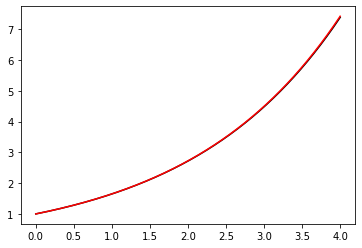

In [145]:
dt = 0.01
T = 4
t = np.arange(0, T + dt, dt)

n = t.size
x = np.zeros(n)
x[0] = x0

for k in range(n - 1):
    x[k + 1] = x[k] / (1 - dt * lam)
    
plt.plot(tplot, x_true(tplot), 'k', t, x, 'r')

In [146]:
err_local = np.abs(x[1] - x_true(t[1]))
print(err_local)

1.260476873965466e-05


In [147]:
err_global = np.abs(x[-1] - x_true(t[-1]))
print(err_global)

0.037162033093150804


In [148]:
err_max = np.max(np.abs(x - x_true(t)))
print(err_max)

0.037162033093150804


Notice that once again, the local error shrank by a factor of $10^2$ and the global and maximum error shrank by a factor of 10.  This confirms that backward Euler has second order local accuracy and first order global accuracy.  

We can also check the stability of backward Euler by solving this initial value problem over a much longer time.  Since the true solution is unstable, we expect that our backward Euler approximation will become stable if we make $\Delta t$ sufficiently large.  That is, the true solution goes to infinity, but if we make $\Delta t$ too big then our approximation will go to zero instead.  

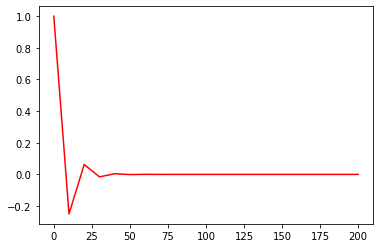

In [149]:
dt = 10
T = 200
t = np.arange(0, T + dt, dt)

n = t.size
x = np.zeros(n)
x[0] = x0

for k in range(n - 1):
    x[k + 1] = x[k] / (1 - dt * lam)
    
plt.plot(t, x, 'r')

This confirms our stability analysis.  

If we switch to $\lambda = -0.5$, we get similar results.  For example, if we choose $\Delta t = 0.1$ then we get 

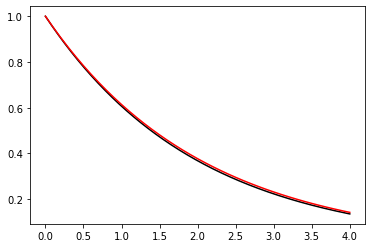

In [150]:
lam = -0.5
x0 = 1
x_true = lambda t: x0 * np.exp(lam * t)

dt = 0.1
T = 4
t = np.arange(0, T + dt, dt)

n = t.size
x = np.zeros(n)
x[0] = x0

for k in range(n - 1):
    x[k + 1] = x[k] / (1 - dt * lam)
    
plt.plot(tplot, x_true(tplot), 'k', t, x, 'r')

In [151]:
err_local = np.abs(x[1] - x_true(t[1]))
print(err_local)

0.0011515278802383122


In [152]:
err_global = np.abs(x[-1] - x_true(t[-1]))
print(err_global)

0.006710399063664968


In [153]:
err_max = np.max(np.abs(x - x_true(t)))
print(err_max)

0.009010041701558003


If we shrink $\Delta t$ by a factor of ten, we get 

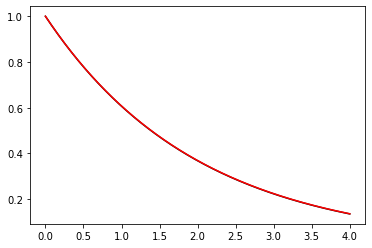

In [154]:
dt = 0.01
T = 4
t = np.arange(0, T + dt, dt)

n = t.size
x = np.zeros(n)
x[0] = x0

for k in range(n - 1):
    x[k + 1] = x[k] / (1 - dt * lam)
    
plt.plot(tplot, x_true(tplot), 'k', t, x, 'r')

In [155]:
err_local = np.abs(x[1] - x_true(t[1]))
print(err_local)

1.2396429208361148e-05


In [156]:
err_global = np.abs(x[-1] - x_true(t[-1]))
print(err_global)

0.0006761125217469854


In [157]:
err_max = np.max(np.abs(x - x_true(t)))
print(err_max)

0.0009177873408658388


Notice that the local error decreased by a factor of $10^2$, while the global and maximum error only decreased by a factor of 10.  This confirms our accuracy analysis.  

To test the stability properties, we should solve the same initial value problem over a much longer time period.  The true solution is stable, so we would like our approximation to to zero as well.  We already know from our stability analysis that the backward Euler approximation should remain stable no matter how large $\Delta t$ is.  For instance, 

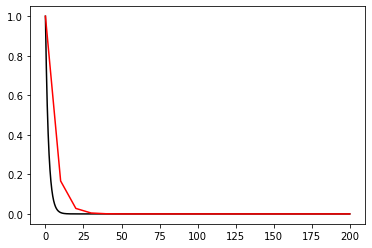

In [158]:
dt = 10
T = 200
t = np.arange(0, T + dt, dt)

n = t.size
x = np.zeros(n)
x[0] = x0

for k in range(n - 1):
    x[k + 1] = x[k] / (1 - dt * lam)
    
tplot = np.linspace(0, T, 1000)
plt.plot(tplot, x_true(tplot), 'k', t, x, 'r')

Notice that our approximation is quite bad for the first several time steps, because we chose a very large $\Delta t$, but we still got the long term behavior correct.  This confirms our stability analysis for the backward Euler method.  

# Pre-defined Solvers
Python has several pre-defined functions for solving differential equations.  The most popular is in the `integrate` subpackage of `scipy` and is called `solve_ivp`.  The syntax for `solve_ivp` is 

`sol = scipy.integrate.solve_ivp(function, time_span, initial_condition)`

The function input should be a python function for the right hand side of the differential equation $f(t, x)$.  The time span is a pair of numbers in parentheses, separated by a comma (this is called a *tuple*).  The first number is the initial time (always zero in this class) and the second number is the final time $T$.  The initial condition is a 1D array with only one entry: $x_0$.  The return value is a somewhat odd type (similar to the OptimizeResult we got from `minimize` and `minimize_scalar`).  It has two properties that will be particularly relevant to us: `sol.t` is an array of $t$ values starting at 0 and ending at $T$ (just like the array `t` we made in the above code) and `sol.y` is a row vector (that is, a 2D array with one row and many columns), where each entry is $x$ at the corresponding $t$ value.  This is the same as the array `x` we made in the above code, except that it is a 2D array.  The fact that this is a 2D array is fairly inconvenient, especially when you try to plot it, so it's probably easier to just turn it into a 1D array right away with something like `x = sol.y[0, :]`.  

For example, to solve the initial value problem 

$\dot{x} = 0.5x$ and $x(0) = 1$

up to time $T = 4$, we would use the code

In [159]:
import scipy.integrate

f = lambda t, x: 0.5 * x
tspan = (0, 4)
x0 = np.array([1])
sol = scipy.integrate.solve_ivp(f, tspan, x0)
t = sol.t
x = sol.y[0, :]
print(t)

[0.         0.1148928  1.2638208  3.47492466 4.        ]


In [160]:
print(x)

[1.         1.0591285  1.8812069  5.68300378 7.38918656]


Pay careful attention to the types and dimensions of all the variables involved.  It's very easy to forget that `tspan` should be a tuple or that `x0` is supposed to be a 1D array, or that `sol.t` is a 1D array while `sol.y` is a 2D array.  We will learn why we need to use this strange setup when we get to systems of differential equations next week.  

It is important to note that we did not actually specify a $\Delta t$ in this code.  The `solve_ivp` function chooses its own spacing for the vector $t$.  It is entirely possible for python to choose any $\Delta t$, and even to choose different spacings between different points (as it did here).  In general, it tries to make $\Delta t$ small enough that the global error is $\approx 10^{-3}$.  

You might expect that such a small error would mean that you would get a very good plot of the solution.  For instance, 

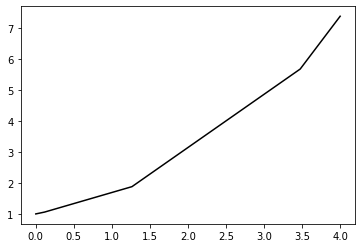

In [161]:
plt.plot(t, x, 'k')

However, this looks pretty bad.  The problem is that, although the error is quite low at each point, there are not enough points to make a smooth curve.  You can force `solve_ivp` to give you more approximations with the option `t_eval`.  For example, if we wanted to get the solution at evenly spaced times with $\Delta t = 0.01$, then we could use the code: 

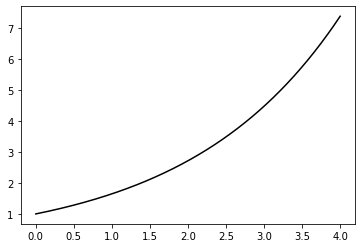

In [162]:
dt = 0.01
T = 4
t = np.arange(0, T + dt, dt)
tspan = (0, T)
x0 = np.array([1])
sol = scipy.integrate.solve_ivp(f, tspan, x0, t_eval=t)
x = sol.y[0, :]

plt.plot(t, x, 'k')

If you use `t_eval=t` like this, then `sol.t` will be the same thing as `t` and `sol.y` will have an x value for every entry in t.  It's important to note that making `dt` smaller in this code won't actually improve the error.  The `solve_ivp` function uses whatever time step it wants to solve the differential equation, and then interpolates the solution (using methods from week 6) to find $x$ at each of the $t$-values you asked for.  

I will often ask you to use `t_eval` like this on the homework, because it will ensure that both MATLAB and python produce similar approximations.  

We will talk about how to implement the method used by `solve_ivp` next week, but for now you should just assume that this value is quite close to the true solution.  